Datatrained
Evaluation Project - 10
Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('insuranceclaim.csv')

In [3]:
#To view all columns in data
pd.set_option('display.max_columns',None)

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
df.shape

(1000, 40)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
print(df.fraud_reported.value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


# Null Check

In [8]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.drop('_c39',axis=1,inplace=True)

In [10]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [11]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [12]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [13]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [14]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [15]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [16]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [17]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [18]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [19]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

# Filling ? Values

In [20]:
#replace the values with mode
df['police_report_available']=df['police_report_available'].replace('?','NO')
df['property_damage']=df['property_damage'].replace('?','NO')
df['collision_type']=df['collision_type'].replace('?','Rear Collision')

In [21]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [22]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [23]:
df['fraud_reported']=df['fraud_reported'].replace('Y','YES')
df['fraud_reported']=df['fraud_reported'].replace('N','NO')

In [24]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,YES
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,YES
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,NO
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,YES
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,NO
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,NO
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,NO
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,NO


# EDA and cleaning

In [25]:
def cat_plot(col):
    plt.figure(figsize=(14,6))
    plt.title('Title for '+col)
    sns.countplot(df[col])
    plt.show()

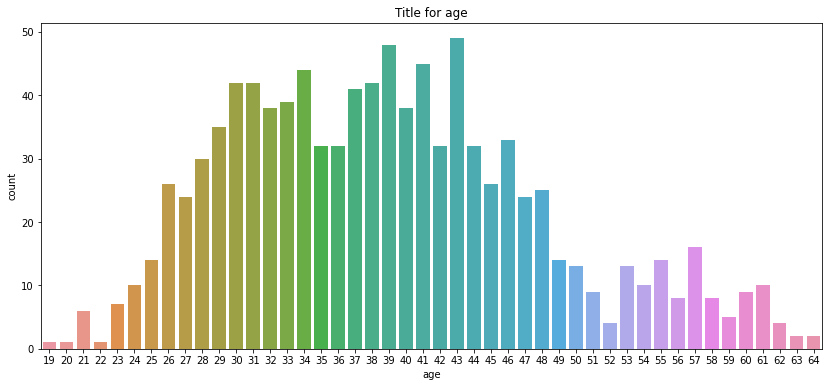

In [26]:
cat_plot('age')

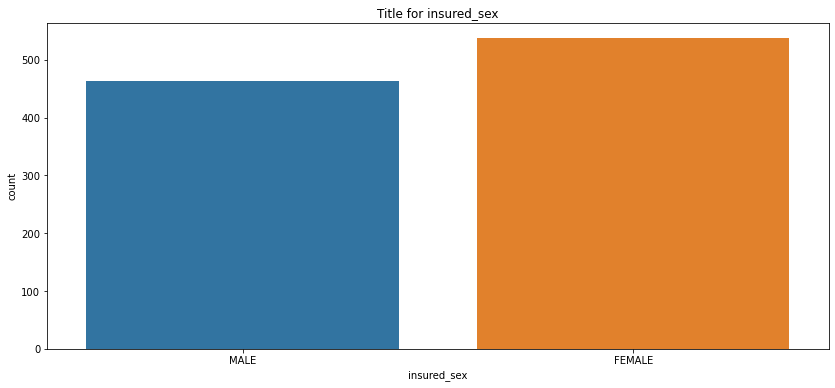

In [27]:
cat_plot('insured_sex')

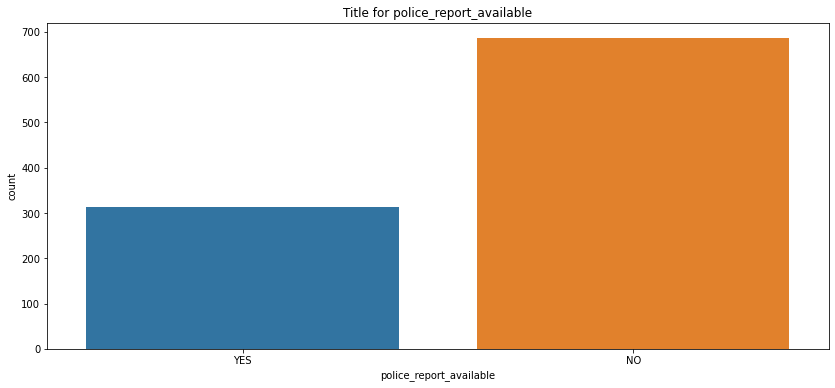

In [28]:
cat_plot('police_report_available')

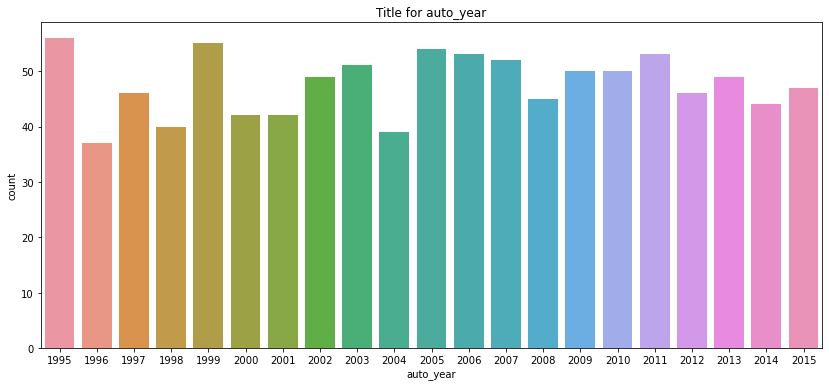

In [29]:
cat_plot('auto_year')

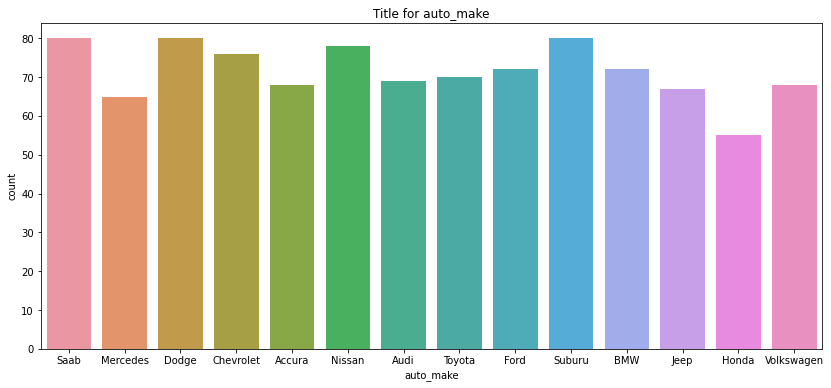

In [30]:
cat_plot('auto_make')

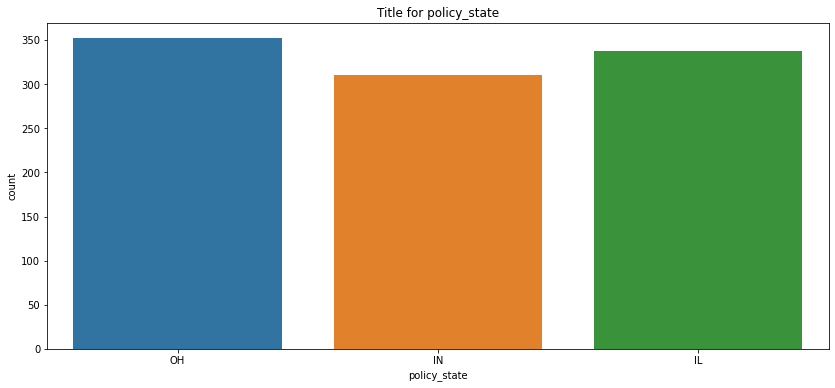

In [31]:
cat_plot('policy_state')

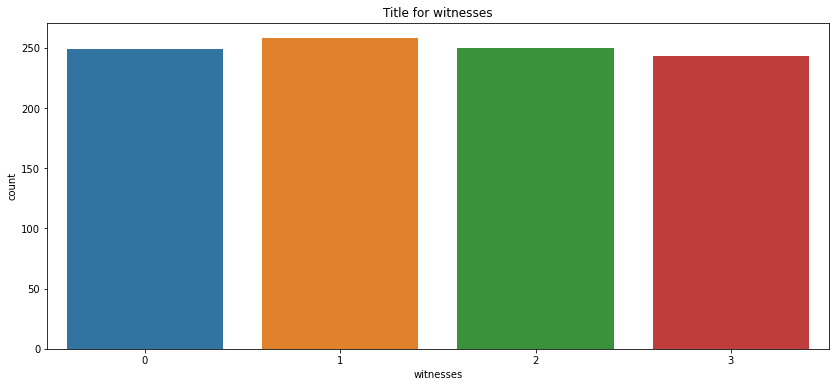

In [32]:
cat_plot('witnesses')

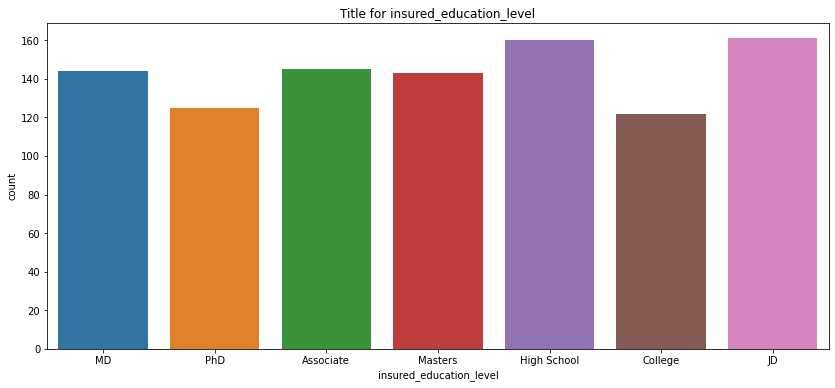

In [33]:
cat_plot('insured_education_level')

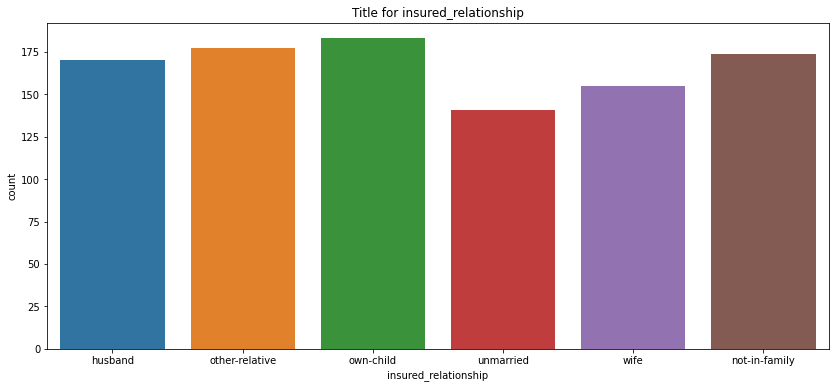

In [34]:
cat_plot('insured_relationship')

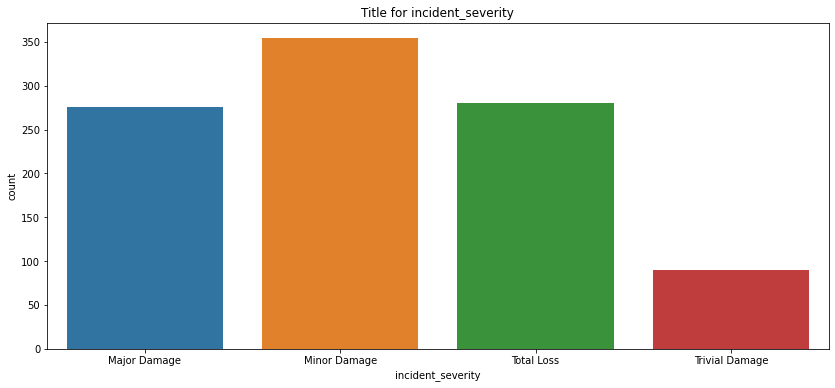

In [35]:
cat_plot('incident_severity')

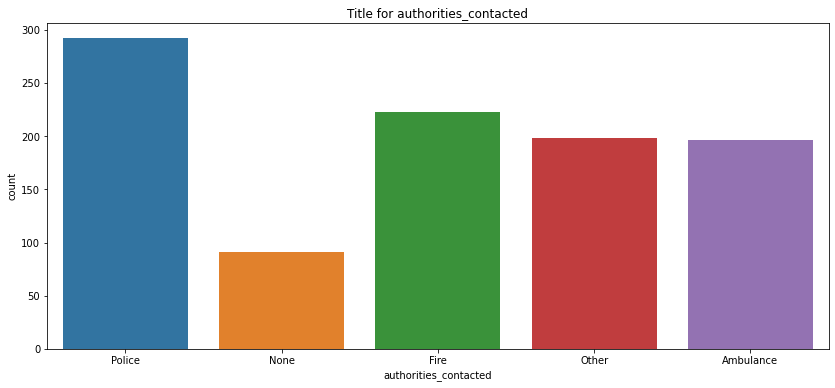

In [36]:
cat_plot('authorities_contacted')

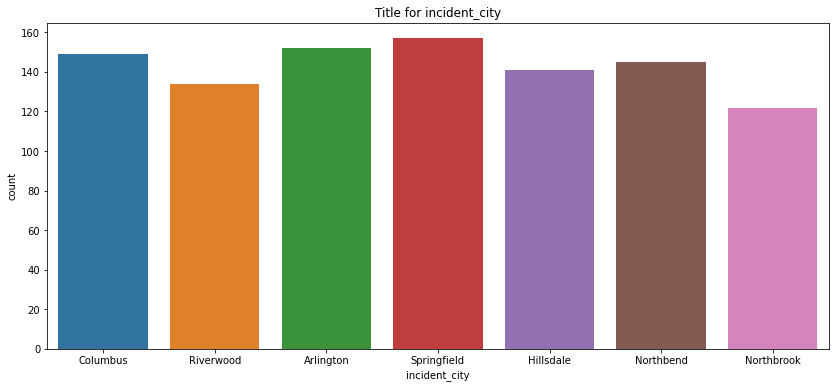

In [37]:
cat_plot('incident_city')

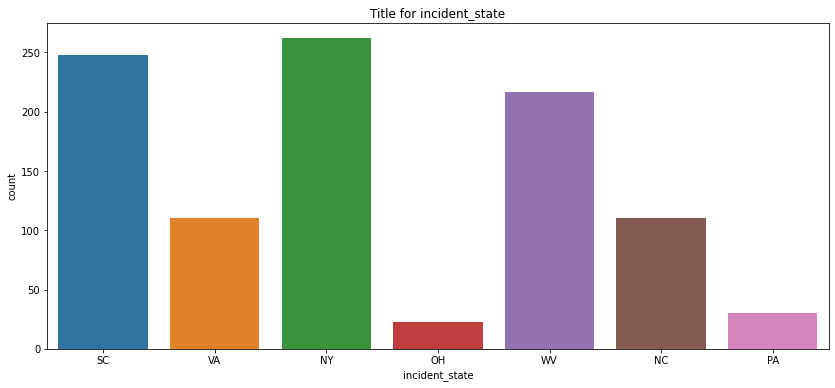

In [38]:
cat_plot('incident_state')

In [39]:
def cat_plot(col):
    plt.figure(figsize=(23,8))
    plt.title('Title for '+col)
    sns.countplot(df[col])
    plt.show()

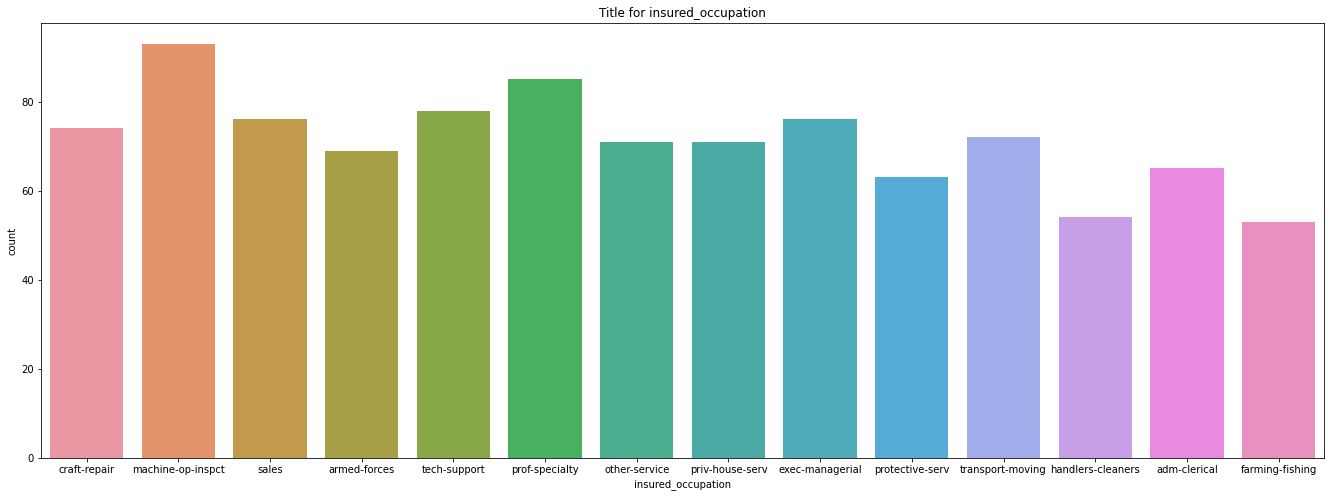

In [40]:
cat_plot('insured_occupation')

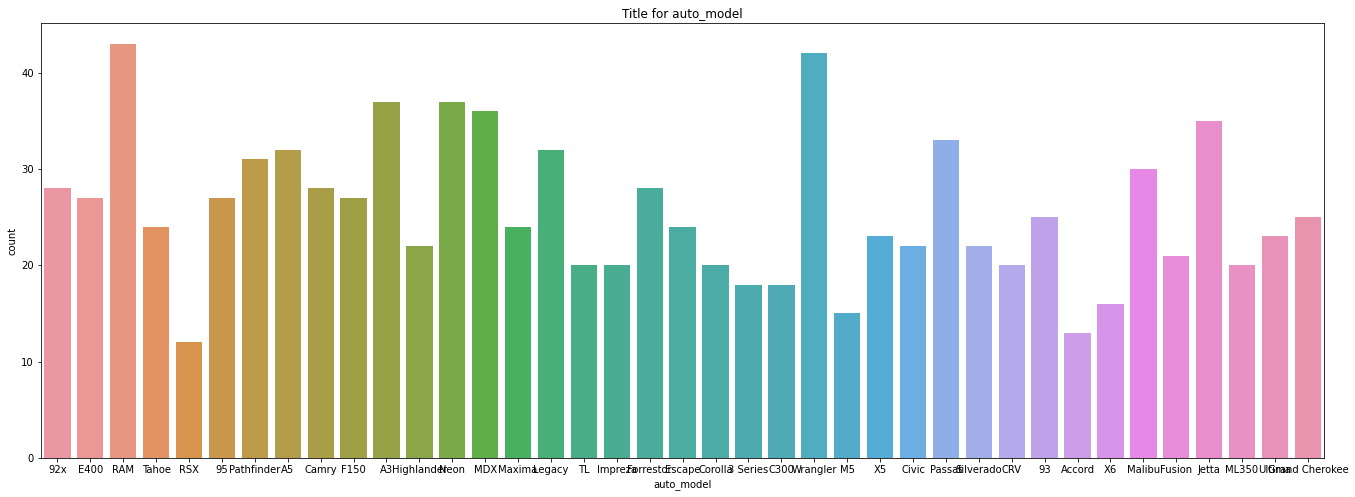

In [41]:
cat_plot('auto_model')

In [42]:
df['policy_state']=df['policy_state'].replace('OH','1')
df['policy_state']=df['policy_state'].replace('IL','2')
df['policy_state']=df['policy_state'].replace('IN','3')

In [43]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,1,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,YES
1,228,42,342868,27-06-2006,3,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,YES
2,134,29,687698,06-09-2000,1,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,NO
3,256,41,227811,25-05-1990,2,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,YES
4,228,44,367455,06-06-2014,2,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,1,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,NO
996,285,41,186934,05-01-2014,2,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,NO
997,130,34,918516,17-02-2003,1,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,NO
998,458,62,533940,18-11-2011,2,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,NO


In [44]:
df=df.drop(['auto_model','auto_make','insured_hobbies','incident_location','authorities_contacted','incident_date','insured_occupation','policy_bind_date','insured_education_level','insured_relationship','incident_location'],axis=1,inplace=False)

In [45]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_type,collision_type,incident_severity,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,1,250/500,1000,1406.91,0,466132,MALE,53300,0,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,2004,YES
1,228,42,342868,3,250/500,2000,1197.22,5000000,468176,MALE,0,0,Vehicle Theft,Rear Collision,Minor Damage,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,2007,YES
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,FEMALE,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,2007,NO
3,256,41,227811,2,250/500,2000,1415.74,6000000,608117,FEMALE,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,2014,YES
4,228,44,367455,2,500/1000,1000,1583.91,6000000,610706,MALE,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,2009,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1,500/1000,1000,1310.80,0,431289,FEMALE,0,0,Single Vehicle Collision,Front Collision,Minor Damage,NC,Northbrook,20,1,YES,0,1,NO,87200,17440,8720,61040,2006,NO
996,285,41,186934,2,100/300,1000,1436.79,0,608177,FEMALE,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,SC,Northbend,23,1,YES,2,3,NO,108480,18080,18080,72320,2015,NO
997,130,34,918516,1,250/500,500,1383.49,3000000,442797,FEMALE,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,NC,Arlington,4,3,NO,2,3,YES,67500,7500,7500,52500,1996,NO
998,458,62,533940,2,500/1000,2000,1356.92,5000000,441714,MALE,0,0,Single Vehicle Collision,Rear Collision,Major Damage,NY,Arlington,2,1,NO,0,1,YES,46980,5220,5220,36540,1998,NO


In [46]:
df['fraud_reported']=df['fraud_reported'].replace('YES','1')
df['fraud_reported']=df['fraud_reported'].replace('NO','0')
df['police_report_available']=df['police_report_available'].replace('YES','1')
df['police_report_available']=df['police_report_available'].replace('NO','0')
df['property_damage']=df['property_damage'].replace('YES','1')
df['property_damage']=df['property_damage'].replace('NO','0')
df['insured_sex']=df['insured_sex'].replace('MALE','1')
df['insured_sex']=df['insured_sex'].replace('FEMALE','0')

In [47]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_type,collision_type,incident_severity,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,1,250/500,1000,1406.91,0,466132,1,53300,0,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,5,1,1,1,2,1,71610,6510,13020,52080,2004,1
1,228,42,342868,3,250/500,2000,1197.22,5000000,468176,1,0,0,Vehicle Theft,Rear Collision,Minor Damage,VA,Riverwood,8,1,0,0,0,0,5070,780,780,3510,2007,1
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,0,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,7,3,0,2,3,0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,250/500,2000,1415.74,6000000,608117,0,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,5,1,0,1,2,0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,500/1000,1000,1583.91,6000000,610706,1,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,NY,Arlington,20,1,0,0,1,0,6500,1300,650,4550,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1,500/1000,1000,1310.80,0,431289,0,0,0,Single Vehicle Collision,Front Collision,Minor Damage,NC,Northbrook,20,1,1,0,1,0,87200,17440,8720,61040,2006,0
996,285,41,186934,2,100/300,1000,1436.79,0,608177,0,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,SC,Northbend,23,1,1,2,3,0,108480,18080,18080,72320,2015,0
997,130,34,918516,1,250/500,500,1383.49,3000000,442797,0,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,NC,Arlington,4,3,0,2,3,1,67500,7500,7500,52500,1996,0
998,458,62,533940,2,500/1000,2000,1356.92,5000000,441714,1,0,0,Single Vehicle Collision,Rear Collision,Major Damage,NY,Arlington,2,1,0,0,1,1,46980,5220,5220,36540,1998,0


In [48]:
incident_severity=df[['incident_severity']]
incident_severity=pd.get_dummies(df.incident_severity)
incident_severity

,Major Damage,Minor Damage,Total Loss,Trivial Damage
0,1,0,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0
...,...,...,...,...
995,0,1,0,0
996,1,0,0,0
997,0,1,0,0
998,1,0,0,0


In [49]:
incident_type=df[['incident_type']]
incident_type=pd.get_dummies(df.incident_type)
incident_type

,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
995,0,0,1,0
996,0,0,1,0
997,1,0,0,0
998,0,0,1,0


In [50]:
collision_type=df[['collision_type']]
collision_type=pd.get_dummies(df.collision_type)
collision_type

,Front Collision,Rear Collision,Side Collision
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
995,1,0,0
996,0,1,0
997,0,0,1
998,0,1,0


In [51]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_type,collision_type,incident_severity,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,1,250/500,1000,1406.91,0,466132,1,53300,0,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,5,1,1,1,2,1,71610,6510,13020,52080,2004,1
1,228,42,342868,3,250/500,2000,1197.22,5000000,468176,1,0,0,Vehicle Theft,Rear Collision,Minor Damage,VA,Riverwood,8,1,0,0,0,0,5070,780,780,3510,2007,1
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,0,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,7,3,0,2,3,0,34650,7700,3850,23100,2007,0
3,256,41,227811,2,250/500,2000,1415.74,6000000,608117,0,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,5,1,0,1,2,0,63400,6340,6340,50720,2014,1
4,228,44,367455,2,500/1000,1000,1583.91,6000000,610706,1,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,NY,Arlington,20,1,0,0,1,0,6500,1300,650,4550,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1,500/1000,1000,1310.80,0,431289,0,0,0,Single Vehicle Collision,Front Collision,Minor Damage,NC,Northbrook,20,1,1,0,1,0,87200,17440,8720,61040,2006,0
996,285,41,186934,2,100/300,1000,1436.79,0,608177,0,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,SC,Northbend,23,1,1,2,3,0,108480,18080,18080,72320,2015,0
997,130,34,918516,1,250/500,500,1383.49,3000000,442797,0,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,NC,Arlington,4,3,0,2,3,1,67500,7500,7500,52500,1996,0
998,458,62,533940,2,500/1000,2000,1356.92,5000000,441714,1,0,0,Single Vehicle Collision,Rear Collision,Major Damage,NY,Arlington,2,1,0,0,1,1,46980,5220,5220,36540,1998,0


In [52]:
#concatenate Dataframe---> collision type + incident_severity + incident_ type

df=pd.concat([df,collision_type,incident_severity,incident_type],axis=1)

In [53]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_type,collision_type,incident_severity,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Front Collision,Rear Collision,Side Collision,Major Damage,Minor Damage,Total Loss,Trivial Damage,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
0,328,48,521585,1,250/500,1000,1406.91,0,466132,1,53300,0,Single Vehicle Collision,Side Collision,Major Damage,SC,Columbus,5,1,1,1,2,1,71610,6510,13020,52080,2004,1,0,0,1,1,0,0,0,0,0,1,0
1,228,42,342868,3,250/500,2000,1197.22,5000000,468176,1,0,0,Vehicle Theft,Rear Collision,Minor Damage,VA,Riverwood,8,1,0,0,0,0,5070,780,780,3510,2007,1,0,1,0,0,1,0,0,0,0,0,1
2,134,29,687698,1,100/300,2000,1413.14,5000000,430632,0,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,NY,Columbus,7,3,0,2,3,0,34650,7700,3850,23100,2007,0,0,1,0,0,1,0,0,1,0,0,0
3,256,41,227811,2,250/500,2000,1415.74,6000000,608117,0,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,OH,Arlington,5,1,0,1,2,0,63400,6340,6340,50720,2014,1,1,0,0,1,0,0,0,0,0,1,0
4,228,44,367455,2,500/1000,1000,1583.91,6000000,610706,1,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,NY,Arlington,20,1,0,0,1,0,6500,1300,650,4550,2009,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1,500/1000,1000,1310.80,0,431289,0,0,0,Single Vehicle Collision,Front Collision,Minor Damage,NC,Northbrook,20,1,1,0,1,0,87200,17440,8720,61040,2006,0,1,0,0,0,1,0,0,0,0,1,0
996,285,41,186934,2,100/300,1000,1436.79,0,608177,0,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,SC,Northbend,23,1,1,2,3,0,108480,18080,18080,72320,2015,0,0,1,0,1,0,0,0,0,0,1,0
997,130,34,918516,1,250/500,500,1383.49,3000000,442797,0,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,NC,Arlington,4,3,0,2,3,1,67500,7500,7500,52500,1996,0,0,0,1,0,1,0,0,1,0,0,0
998,458,62,533940,2,500/1000,2000,1356.92,5000000,441714,1,0,0,Single Vehicle Collision,Rear Collision,Major Damage,NY,Arlington,2,1,0,0,1,1,46980,5220,5220,36540,1998,0,0,1,0,1,0,0,0,0,0,1,0


In [54]:
df=df.drop(['incident_type','collision_type','incident_severity','incident_state','incident_city','umbrella_limit'],axis=1,inplace=False)

In [55]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Front Collision,Rear Collision,Side Collision,Major Damage,Minor Damage,Total Loss,Trivial Damage,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
0,328,48,521585,1,250/500,1000,1406.91,466132,1,53300,0,5,1,1,1,2,1,71610,6510,13020,52080,2004,1,0,0,1,1,0,0,0,0,0,1,0
1,228,42,342868,3,250/500,2000,1197.22,468176,1,0,0,8,1,0,0,0,0,5070,780,780,3510,2007,1,0,1,0,0,1,0,0,0,0,0,1
2,134,29,687698,1,100/300,2000,1413.14,430632,0,35100,0,7,3,0,2,3,0,34650,7700,3850,23100,2007,0,0,1,0,0,1,0,0,1,0,0,0
3,256,41,227811,2,250/500,2000,1415.74,608117,0,48900,-62400,5,1,0,1,2,0,63400,6340,6340,50720,2014,1,1,0,0,1,0,0,0,0,0,1,0
4,228,44,367455,2,500/1000,1000,1583.91,610706,1,66000,-46000,20,1,0,0,1,0,6500,1300,650,4550,2009,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1,500/1000,1000,1310.80,431289,0,0,0,20,1,1,0,1,0,87200,17440,8720,61040,2006,0,1,0,0,0,1,0,0,0,0,1,0
996,285,41,186934,2,100/300,1000,1436.79,608177,0,70900,0,23,1,1,2,3,0,108480,18080,18080,72320,2015,0,0,1,0,1,0,0,0,0,0,1,0
997,130,34,918516,1,250/500,500,1383.49,442797,0,35100,0,4,3,0,2,3,1,67500,7500,7500,52500,1996,0,0,0,1,0,1,0,0,1,0,0,0
998,458,62,533940,2,500/1000,2000,1356.92,441714,1,0,0,2,1,0,0,1,1,46980,5220,5220,36540,1998,0,0,1,0,1,0,0,0,0,0,1,0


In [56]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [57]:
df['policy_csl']=df['policy_csl'].replace('250/500','0.5')
df['policy_csl']=df['policy_csl'].replace('100/300','0.3')
df['policy_csl']=df['policy_csl'].replace('500/1000','0.5')

In [58]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,Front Collision,Rear Collision,Side Collision,Major Damage,Minor Damage,Total Loss,Trivial Damage,Multi-vehicle Collision,Parked Car,Single Vehicle Collision,Vehicle Theft
0,328,48,521585,1,0.5,1000,1406.91,466132,1,53300,0,5,1,1,1,2,1,71610,6510,13020,52080,2004,1,0,0,1,1,0,0,0,0,0,1,0
1,228,42,342868,3,0.5,2000,1197.22,468176,1,0,0,8,1,0,0,0,0,5070,780,780,3510,2007,1,0,1,0,0,1,0,0,0,0,0,1
2,134,29,687698,1,0.3,2000,1413.14,430632,0,35100,0,7,3,0,2,3,0,34650,7700,3850,23100,2007,0,0,1,0,0,1,0,0,1,0,0,0
3,256,41,227811,2,0.5,2000,1415.74,608117,0,48900,-62400,5,1,0,1,2,0,63400,6340,6340,50720,2014,1,1,0,0,1,0,0,0,0,0,1,0
4,228,44,367455,2,0.5,1000,1583.91,610706,1,66000,-46000,20,1,0,0,1,0,6500,1300,650,4550,2009,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1,0.5,1000,1310.80,431289,0,0,0,20,1,1,0,1,0,87200,17440,8720,61040,2006,0,1,0,0,0,1,0,0,0,0,1,0
996,285,41,186934,2,0.3,1000,1436.79,608177,0,70900,0,23,1,1,2,3,0,108480,18080,18080,72320,2015,0,0,1,0,1,0,0,0,0,0,1,0
997,130,34,918516,1,0.5,500,1383.49,442797,0,35100,0,4,3,0,2,3,1,67500,7500,7500,52500,1996,0,0,0,1,0,1,0,0,1,0,0,0
998,458,62,533940,2,0.5,2000,1356.92,441714,1,0,0,2,1,0,0,1,1,46980,5220,5220,36540,1998,0,0,1,0,1,0,0,0,0,0,1,0


In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,cross_validate

In [94]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

In [96]:
x_train.shape

(800, 33)

In [97]:
y_train.shape

(800,)

In [98]:
x_test.shape

(200, 33)

In [99]:
y_test.shape

(200,)

In [100]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
#lr.pred = lr.predict(x_test)

print('Train acc:', accuracy_score(y_train,lr.predict(x_train)))
print('Test acc:', accuracy_score(y_test,lr.predict(x_test)))

Train acc: 0.75125
Test acc: 0.76


In [101]:
model=LogisticRegression()

In [102]:
model.fit(x_train,y_train)

LogisticRegression()

In [103]:
pred=model.predict(x_test)

In [104]:
pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

In [105]:
#accuracy score
accuracy_score(y_test,pred)

0.76

In [106]:
confusion_matrix(y_test,pred)

array([[150,   4],
       [ 44,   2]], dtype=int64)

In [108]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86       154
           1       0.33      0.04      0.08        46

    accuracy                           0.76       200
   macro avg       0.55      0.51      0.47       200
weighted avg       0.67      0.76      0.68       200



# Model Saving

In [109]:
import pickle

#open a file,where you want to store the data
file=open('insuranceclaim.pkl','wb')

#dump information to that file
pickle.dump(lr,file)